# Практична робота №2

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

### Завдання: Генерація та класифікація випадкових даних кредитних заявок

#### Ваше завдання - згенерувати випадковий набір даних про кредитні заявки та побудувати модель класифікації для визначення, чи кредитна заявка "одобрена" чи "відхилена" на основі цих даних.

#### Кроки:

<ol>
    <li>Використовуйте бібліотеку NumPy для генерації випадкових даних. Створіть матрицю ознак X та вектор цільової змінної y. Ознаки можуть бути числовими та категорійними.</li>
    <li>Згенеруйте випадкові дані, що відповідають "одобрено" (клас 1) та "відхилено" (клас 0) кредитних заявок.</li>
    <li>Розділіть дані на тренувальний та тестовий набори.</li>
    <li>Виберіть модель класифікації з бібліотеки scikit-learn (наприклад, метод опорних векторів, логістична регресія або дерево рішень) та навчіть модель на тренувальних даних.</li>
    <li>Оцініть точність моделі на тестовому наборі даних та побудуйте матрицю неправильно класифікованих прикладів та звіт про класифікацію.</li>
    <li>Використайте бібліотеку Matplotlib для візуалізації результатів. Наприклад, побудуйте графік розподілу кредитів за категоріями "одобрено" та "відхилено".</li>
    <li>Збережіть вашу модель та здійсніть прогнози на нових заявках на кредит.</li>
    <li>Запишіть ваш код у окремий файл, додайте коментарі та пояснення, щоб інші могли зрозуміти вашу роботу.</li>
    <li>Проведіть додатковий аналіз та експерименти з даними та параметрами моделі для поліпшення точності.</li>
</ol>



Model accuracy: 0.59

Matrix of incorrectly classified examples:
[[49 51]
 [31 69]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.49      0.54       100
         1.0       0.57      0.69      0.63       100

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



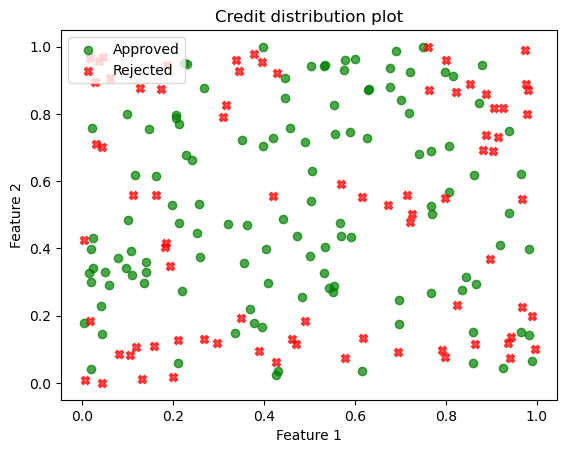

['credit_model.pkl']

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(0)
n_samples = 1000 # Total number of credit applications
n_num_features = 2
n_cat_features = 1
categories = [0, 1]
columns = ['Feature 1', 'Feature 2', 'Category']

# Generation of numeric (matrix) and categorical (vector) features. Eventually, they are combined into all_features matrix
num_features = np.random.rand(n_samples, n_num_features)
cat_features = np.random.choice(categories, size=(n_samples, n_cat_features)) # size = 1000 rows, 2 columns
all_features = np.column_stack((num_features, cat_features))

# Saving all the features to a csv file
df = pd.DataFrame(all_features, columns=columns)
df.to_csv('random_data.csv', index=False)

# Reading the data in appropriate format and splitting it into training and testing sets
data = pd.read_csv('random_data.csv')
X = data[['Feature 1', 'Feature 2']] # Matrix of features
y = data['Category'] # Vector of a target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creation and teaching the model on the training data
model = DecisionTreeClassifier(random_state=42, max_depth=11)
model.fit(X_train, y_train)

# Prediction of 'y' on the test data
y_pred = model.predict(X_test)

# Model accuracy calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

# Matrix of incorrectly classified examples
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nMatrix of incorrectly classified examples:')
print(conf_matrix)

# Classification report
report = classification_report(y_test, y_pred)
print('\nClassification report:')
print(report)

# Making a plot
approved_data = X_test[y_pred == 1]
rejected_data = X_test[y_pred == 0]
plt.scatter(approved_data.iloc[:, 0], approved_data.iloc[:, 1], label='Approved', c='green', marker='o', alpha=0.7)
plt.scatter(rejected_data.iloc[:, 0], rejected_data.iloc[:, 1], label='Rejected', c='red', marker='X', alpha=0.7)
plt.title('Credit distribution plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

# Saving the model
joblib.dump(model, 'credit_model.pkl')